<h1 style='text-align: center;'> Test de Autocorrelación </h1> 

In [1]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
import scipy.stats as st
from IPython.display import display, Markdown

Aplicar el test de autocorrelación 100 números generados por:
1. Productos medios (X0=7363423178943, X1=1324356789532, D=7)
2. Cuadrados medios (X0=7363423178943)
3. ~~El generador Urand (ver el AVAC), x=7363423178943~~ **No existe información en el AVAC sobre este generador.**
4. ~~RandomNumbers.txt (archivo cargado al AVAC)~~ **No existe el archivo en el AVAC.**

Deberá indicar si los números tienen autocorrelación o no, y esperificar el valor calculado, así como las conclusiones y su correspondiente gráfica de dispersión.

### Formula para el test de autocorrelación
<img src="./imgs/Test_autocorrelacion.png" width="500px">

In [2]:
#Funciones para el test de autocorrelación
def caltulate_test_autocorrelacion(random_number_list, lag=5, i=5):
    aux_random_number_list = np.array(random_number_list)
    size = len(aux_random_number_list)
    
    newdata = []
    for k in range(i-1):
        newdata = np.delete(aux_random_number_list,[i])
    rangecal = len(newdata)/lag
    
    rho = 0
    for j in range(int(rangecal)):
        rho += newdata[j*lag]*newdata[(j*lag)+lag]
        
    #print(rho)
    m = (size - i)/(lag-1)
    m = m - (m -int(m))
    mnew = 1/(1 + m)
    rhoin = mnew*rho - 0.25
    #print(rhoin)
    x = math.sqrt(13*m+1)
    stddev=x/(12*(m+1))
    #print(stddev)
    
    z = rhoin/stddev
    
    pval = 2 * (1 - st.norm.cdf(z))
    state = 'SI'
    if(pval <= 0.05):
        state = 'NO'
    return pval, state

def generate_chart_scatter(x,y,title,xlabel,ylabel):
    fig = px.scatter(x=x, y=y)
    fig.update_layout(title_text=title, title_x=0.5)
    fig.update_layout(
        xaxis_title=xlabel,
        yaxis_title=ylabel
    )
    fig.show('png')

### Productos Medios

**Test de Autocorrelación para productos medios**

**Z0:** 0.7111149019729381, por lo que SI pasa la prueba de autocorrelación.

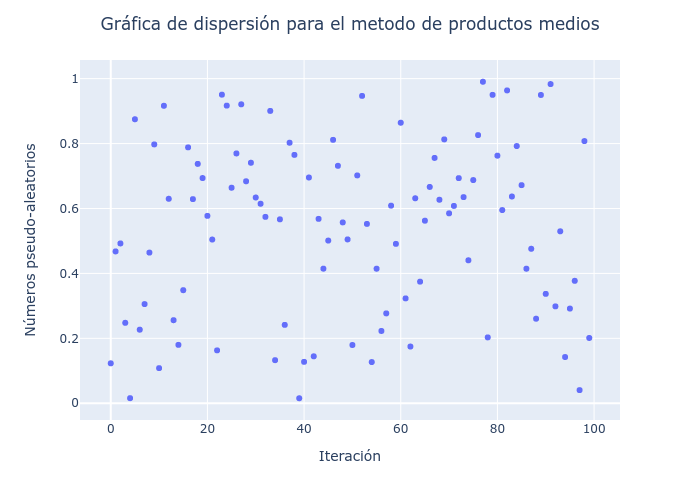

In [3]:
list_productos_medios = []
x0 = 7363423178943
x1 = 1324356789532
digitos = 7
iterations = 100

def get_mid(number, digitos):
    nmedio = []
    sobra = len(number) - digitos
    n = sobra%2 != 0
    div = sobra/2
    if n:
        div = (sobra+1)/2
        number = '0' + number
    for i in range(0,int(len(number) - div) + 1):
        if i > div:
            nmedio.append(number[i-1])
    res = ''
    for i in range(len(nmedio)):
        res = res + nmedio[i]
    return res
        
x0 = x0
x00 = x1
for i in range(iterations):
    yn = int(x0) * int(x00)
    mid = get_mid(str(yn),digitos)
    list_productos_medios.append(float(f'0.{mid}'))
    x0 = x00
    x00 = mid

z, state = caltulate_test_autocorrelacion(list_productos_medios, 5, 5)
display(Markdown(f'**Test de Autocorrelación para productos medios**'))
display(Markdown(f'**Z0:** {z}, por lo que {state} pasa la prueba de autocorrelación.'))
generate_chart_scatter(range(100),list_productos_medios,'Gráfica de dispersión para el metodo de productos medios',
                      'Iteración', 'Números pseudo-aleatorios')

### Cuadrados Medios

**Test de Autocorrelación para cuadrados medios**

**Z0:** 1.9404105984528797, por lo que SI pasa la prueba de autocorrelación.

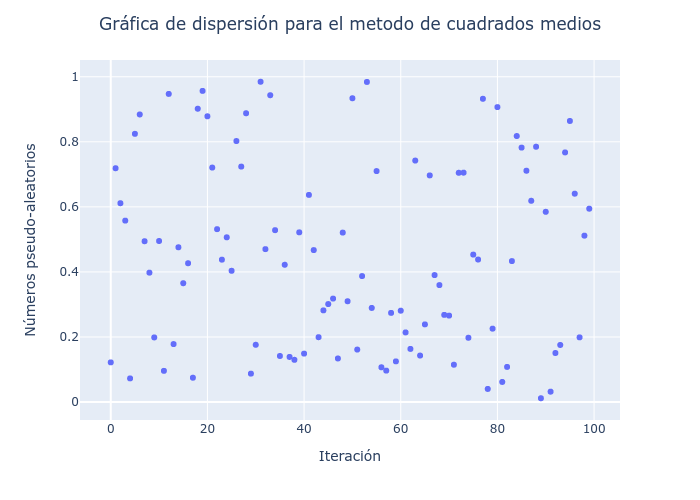

In [4]:
list_cuadrados_medios = []
xo = 7363423178943
digitos = 7
iterations = 100

xn = xo
for _ in range(iterations):
    xnn = xn**2
    txnn = str(xnn).zfill(8)
    tam = len(txnn)
    ui = int(txnn[int(tam/2 - digitos/2):int(tam/2 + digitos/2)])
    rn = ui/(int('9'*digitos) + 1)
    list_cuadrados_medios.append(rn)
    xn = ui
    
z, state = caltulate_test_autocorrelacion(list_cuadrados_medios, 5, 5)
display(Markdown(f'**Test de Autocorrelación para cuadrados medios**'))
display(Markdown(f'**Z0:** {z}, por lo que {state} pasa la prueba de autocorrelación.'))
generate_chart_scatter(range(100),list_cuadrados_medios,'Gráfica de dispersión para el metodo de cuadrados medios',
                      'Iteración', 'Números pseudo-aleatorios')

### Conclusiones
1. Al utilizar las pruebas de autocorrelación, hay que tener cuidado. La autocorrelación puede detectarse después de numerosas pruebas incluso cuando no existe autocorrelación.
2. La autocorrelación no es muy sensible a valores pequeños de M, cuando los valores que se prueban están en el lado bajo. Por ejemplo, si todos los valores fueran iguales a cero, entonces el valor resultante sería -1,95, que no es suficiente para rechazar la hipótesis.